# What is Machine Learning ?

* The umbrella term "machine learning" describes methods for *automated data analysis*, developed by computer scientists and statisticians in response to the appearance of ever larger datasets.


* The goal of automation has led to a very uniform terminology, enabling multiple algorithms to be implemented and compared on an equal footing.


* Machine learning can be divided into two types: *supervised* and *unsupervised.* 

## Supervised Learning

* Supervised learning is also known as *predictive* learning. Given *inputs* $X$, the goal is to construct a machine that can accurately predict a set of *outputs* $y$. 


* The "supervision" refers to the education of the machine, via a *training set* $D$ of input-output pairs that we provide. Prediction accuracy is then tested on *validation* and *test* sets.


* At the heart of the prediction machine is a *model* $M$ that can be *trained* to give accurate predictions.


* The outputs $y$ are said to be *response variables* - predictions of $y$ will be generated by our model. The variables $y$ can be either *categorical* ("labels") or *nominal* (real numbers). When the $y$ are categorical, the problem is one of *classification* ("is this an image of a kitten, or a puppy?"). When the $y$ are numerical, the problem is a *regression* ("how should we interpolate between these values?").


* Supervised learning is about making predictions by characterizing ${\rm Pr}(y_k|x_k,D,M)$.

<img src="figures/supervised_workflow.svg" width=100%>

## Unsupervised Learning

* Also known as *descriptive* learning. Here the goal is "knowledge discovery" - detection of patterns in a dataset, that can then be used in supervised/model-based analyses. 


* Unsupervised learning is about *density estimation* - characterizing ${\rm Pr}(x|\theta,H)$.


* Examples of unsupervised learning activities include:

  * Clustering analysis of the $x$.
  * Dimensionality reduction: principal component analysis, independent component analysis, etc.
  

* In this lesson we will focus on supervised learning, since it is arguably somewhat closer to our goal of gaining understanding from data.


## Data Representations

* Each input $x$ is said to have $P$ *features* (or *attributes*), and represents a *sample* drawn from a population. Each sample input $x$ is associated with an output $y$.


* Our $N$ input *samples* are packaged into $N \times P$ *design matrix* $X$ (with $N$ rows and $P$ columns).

<img src="figures/data_representation.svg" width=100%>

## Dataset Split

* We *train* our machine learning models on a subset of the data, and then test them against the remainder.

<img src="figures/train_test_split_matrix.svg" width=100%>

## Simple Example: The Digits Dataset

* Let's take a look at one of the `SciKit-Learn` example datasets, `digits`

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


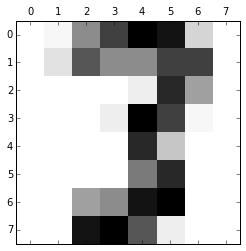

In [5]:
plt.matshow(digits.images[23], cmap=plt.cm.Greys)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.target[23]

3


* In `SciKit-Learn`,  `data` contains the design matrix $X$, and is a `numpy` array of shape $(N, P)$


* `target` contains the response variables $y$, and is a `numpy` array of shape $(N)$

In [9]:
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

Splitting the data:

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [11]:
X_train.shape,y_train.shape

((1347, 64), (1347,))

In [12]:
X_test.shape,y_test.shape

((450, 64), (450,))

In [13]:
?train_test_split

## Other Example Datasets

`SciKit-Learn` provides 5 "toy" datasets for tutorial purposes, all `load`-able in the same way:

Name        | Description
------------|:---------------------------------------
`boston`	| Boston house-prices, with 13 associated measurements (R)
`iris`	    | Fisher's iris classifications (based on 4 characteristics) (C)
`diabetes`	| Diabetes (x vs y) (R)
`digits`	| Hand-written digits, 8x8 images with classifications (C)
`linnerud`	| Linnerud: 3 exercise and 3 physiological data (R)


* "R" and "C" indicate that the problem to be solved is either a regression or a classification, respectively.

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

/Users/pjm/lsst/DarwinX86/anaconda/2.1.0-4-g35ca374/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/pjm/lsst/DarwinX86/anaconda/2.1.0-4-g35ca374/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


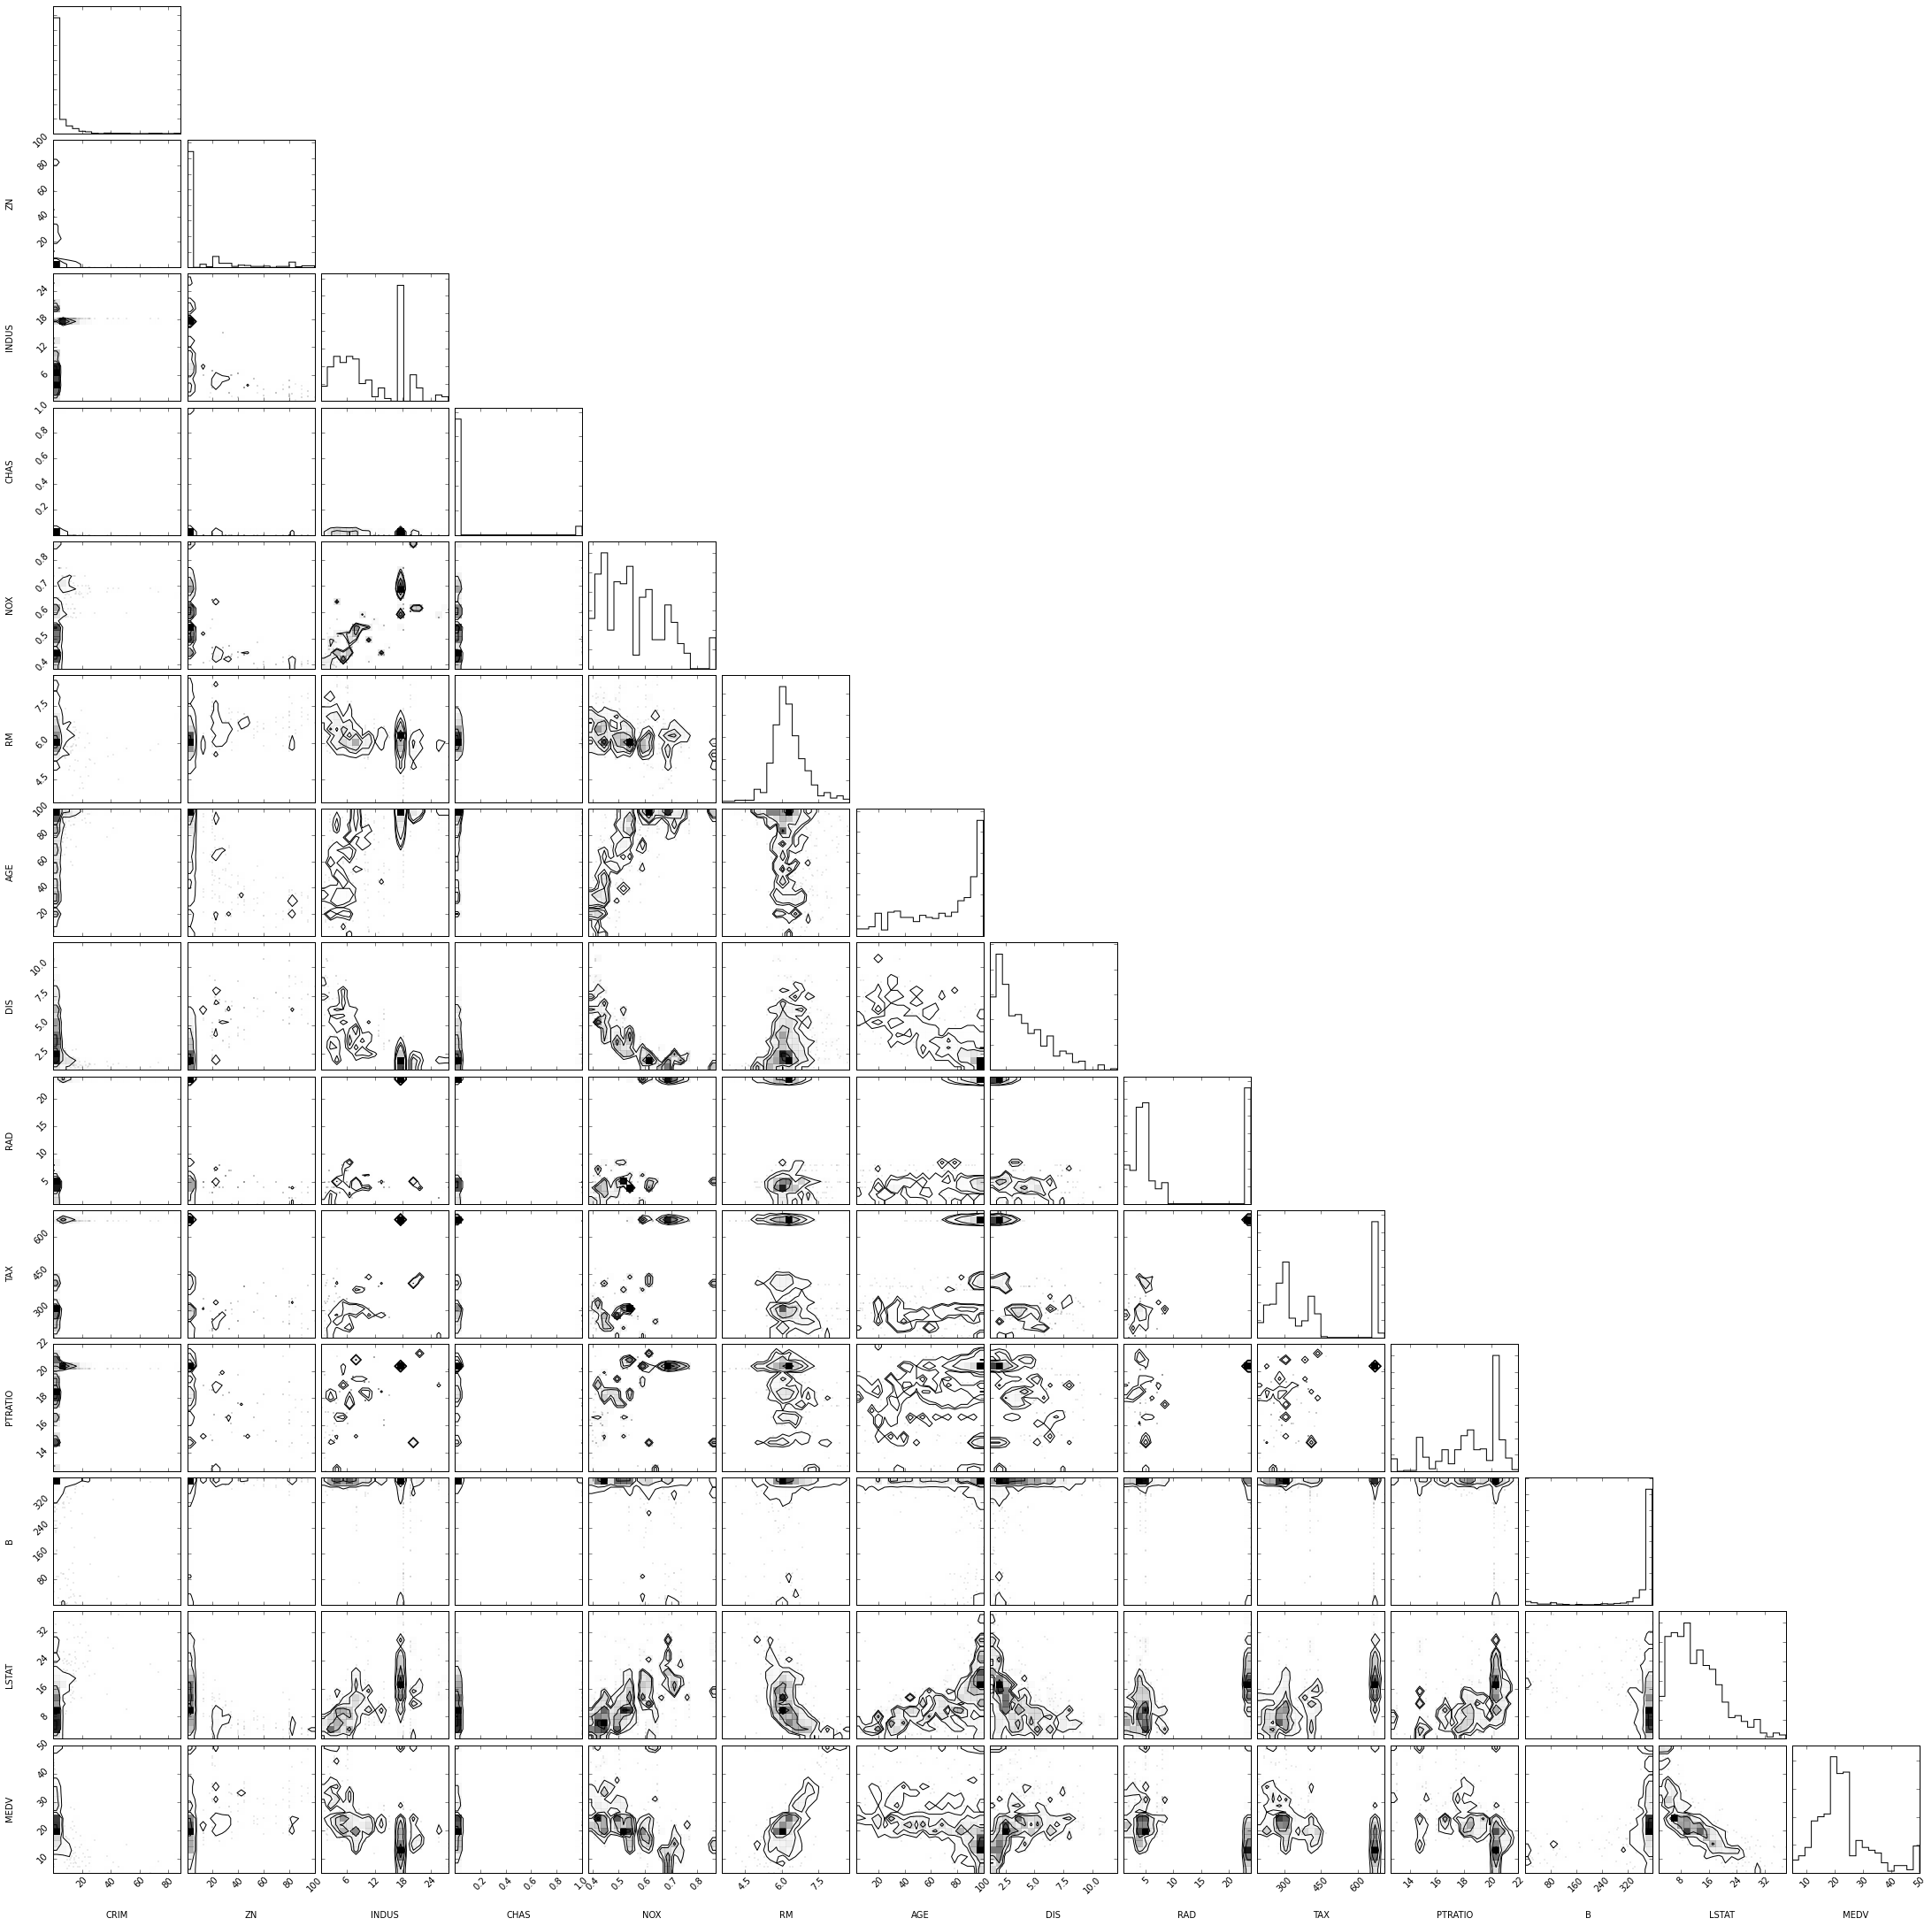

In [15]:
# Visualizing the Boston house price data:

import corner

X = boston.data
y = boston.target

plot = np.concatenate((X,np.atleast_2d(y).T),axis=1)
labels = np.append(boston.feature_names,'MEDV')

corner.corner(plot,labels=labels);

### Question:

Talk to your neighbor for a few minutes about the things you have just heard about machine learning. In this course have we been talking about regression or classification problems? Have our models been supervised or unsupervised? How are our example astronomical datasets similar to the toy datasets in `SciKit-Learn`? And how are they different?

#### [Let's move on to look a simple worked example](Linear_Regression.ipynb)